# Preferenciális csatlakozási események

A cél az, hogy megvizsgáljuk, hogy mennyire befolyásolja azt, hogy ha nem véletleserű, hanem valahogy befolyásolt a csatlakozási esemény, akkor za milyen eredményeket produkál. Ezért egy lineáris preferáltságot vezetünk be, mely torzítani fogja a rendszer fokszám eloszlását. Attól függően, hogy miylen értéket választunk lép fel ez a torzulás a véletlenszerű esethez képest oly formában, hogy ha a kis fokszám tagok lesznek preferáltak, akkor az alacsony fokszámok előfordulás lesz gyakoribb, míg ellenkező esetben a nagyobbak, mindezt a véletlenszerű esethez viszonyítva.

N most a csúcsok számáz fogja adni.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import random
import sys
import os

In [2]:
def pref1(N,mode):
    #node_list, link_list
    #bonus: a node_list adja majd a fokszámot is
    node_list = np.zeros(N)
    node_k = np.zeros(N)
    link_list = []
    if(mode == '1'):
        #egy csúcs, de a második ehhez mindig csatlakozik
        node_k[0]+=1
        node_k[1]+=1
        node_list[0] = 0
        node_list[1] = 1
        link_list.append([0,1])
        point = 2
    if(mode == '2'): #2+2+2+1+1
        #mindegy milyen sorrendben vannak, hiszen nincs link_list
        node_list[0] = 0
        node_list[1] = 1
        node_list[2] = 2
        node_list[3] = 3
        node_list[4] = 4
        #viszont a fokszámaik legyenek megfelelően
        node_k[0] = 2
        node_k[1] = 2
        node_k[2] = 2
        node_k[3] = 1
        node_k[4] = 1
        point = 5
        
        if(random.random() < 0.5):
            link_list.append([0,1])
            link_list.append([0,2])
            link_list.append([1,3])
            link_list.append([2,4])
        else:
            link_list.append([0,1])
            link_list.append([1,2])
            link_list.append([2,3])
            link_list.append([3,4])
            
    if(mode == '3'): #4+1+1+1+1
        #mindegy milyen sorrendben vannak, hiszen nincs link_list
        node_list[0] = 0
        node_list[1] = 1
        node_list[2] = 2
        node_list[3] = 3
        node_list[4] = 4
        #viszont a fokszámaik legyenek megfelelően
        node_k[0] = 4
        node_k[1] = 1
        node_k[2] = 1
        node_k[3] = 1
        node_k[4] = 1
        point = 5
        link_list.append([0,1])
        link_list.append([0,2])
        link_list.append([0,3])
        link_list.append([0,4])
        
    while (point < N):
        A_norm = 0
        node_list[point] = point
        node_k[point] = 0
        for i in range(0,point):
            A_norm += node_k[i]
        #most megvan a szum, mehet a preferencia
        #mivel minden meglévő node-nak van egy nem nulla fokszáma, így a node_k/A értelmes, ha alatta dobunk, akkor csatlakozás
        #eredendően ha nagyobb ez a szám, akkor 
        for i in range(0,point):
            #végig söprés a nodokon
            if(random.random() < node_k[i]/A_norm):
                node_k[point]+=1
                node_k[i]+=1
                link_list.append([i,point])
        point+=1
    return node_list, node_k, np.array(link_list, dtype="int")

In [3]:
n1,n1k,ll1 = pref1(100,'1')

In [4]:
print(ll1)
print(ll1.shape)

[[ 0  1]
 [ 0  3]
 [ 0  6]
 [ 3  6]
 [ 3  7]
 [ 6  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 6 10]
 [ 7 11]
 [ 7 12]
 [ 1 13]
 [ 3 13]
 [10 13]
 [ 7 14]
 [ 3 15]
 [ 1 16]
 [ 0 17]
 [13 17]
 [ 7 19]
 [ 0 21]
 [ 7 21]
 [21 22]
 [ 3 24]
 [11 25]
 [13 25]
 [11 26]
 [ 7 27]
 [21 29]
 [24 29]
 [ 7 30]
 [ 3 32]
 [15 32]
 [29 32]
 [13 33]
 [22 33]
 [ 0 34]
 [29 35]
 [ 0 36]
 [15 36]
 [ 0 39]
 [ 0 40]
 [10 40]
 [13 40]
 [13 41]
 [ 7 43]
 [ 7 44]
 [ 3 45]
 [ 9 45]
 [40 47]
 [ 0 48]
 [ 6 50]
 [45 52]
 [47 53]
 [11 55]
 [45 56]
 [ 3 57]
 [ 7 59]
 [45 59]
 [ 3 60]
 [50 61]
 [ 0 63]
 [ 7 63]
 [22 63]
 [ 0 65]
 [29 65]
 [40 66]
 [ 3 67]
 [24 68]
 [ 6 69]
 [11 71]
 [ 0 72]
 [ 3 72]
 [40 74]
 [10 75]
 [ 0 76]
 [61 76]
 [22 78]
 [30 78]
 [ 0 80]
 [ 3 82]
 [ 7 83]
 [44 86]
 [50 86]
 [65 86]
 [29 87]
 [ 3 94]
 [21 94]
 [29 96]
 [ 3 97]
 [33 97]
 [ 6 98]
 [43 98]
 [ 3 99]
 [12 99]]
(96, 2)


Láthatóan működik, így most annyi a dolgom, hogy írok rá egy hosszabb ciklust, ami végigmegy a [1e+5;9x1e+5] tartományon, 2x1e+5 léptékkel

In [18]:
start = 10000
step = 20000
max1 = []
max2 = []
max3 = []
k1 = []
k2 = []
k3 = []

os.system("mkdir data0")

for i in range(0,2):
    for j in range(0,10):
        sys.stdout.write('\rCurrent:\t N={0}\t at:{1}'.format(start+i*step,j))
        sys.stdout.flush()
        c_n1, c_nk1, c_ll1 = pref1(N=(start+i*step),mode='1')
        c_n2, c_nk2, c_ll2 = pref1(N=(start+i*step),mode='2')
        c_n3, c_nk3, c_ll3 = pref1(N=(start+i*step),mode='3')
        #zip
        nodes1 = np.array(list(zip(c_n1,c_nk1)),dtype="int")
        nodes2 = np.array(list(zip(c_n2,c_nk2)),dtype="int")
        nodes3 = np.array(list(zip(c_n3,c_nk3)),dtype="int")
        
        c_ll1 = np.array(c_ll1, dtype="int")
        c_ll2 = np.array(c_ll2, dtype="int")
        c_ll3 = np.array(c_ll3, dtype="int")
        
        n_node1 = "node" + str(start+i*step) + "m1_" + str(j+1) +".txt"
        n_node2 = "node" + str(start+i*step) + "m2_" + str(j+1) +".txt"
        n_node3 = "node" + str(start+i*step) + "m3_" + str(j+1) +".txt"
        
        n_link1 = "link" + str(start+i*step) + "m1_" + str(j+1) + ".txt"
        n_link2 = "link" + str(start+i*step) + "m2_" + str(j+1) + ".txt"
        n_link3 = "link" + str(start+i*step) + "m3_" + str(j+1) + ".txt"
        
        np.savetxt(fname=n_node1,X=nodes1,fmt='%i',delimiter=',');np.savetxt(fname=n_link1,X=c_ll1,fmt='%i',delimiter=',')
        np.savetxt(fname=n_node2,X=nodes2,fmt='%i',delimiter=',');np.savetxt(fname=n_link2,X=c_ll2,fmt='%i',delimiter=',')
        np.savetxt(fname=n_node3,X=nodes3,fmt='%i',delimiter=',');np.savetxt(fname=n_link3,X=c_ll3,fmt='%i',delimiter=',')
        
        #maxok
        max1.append(max(c_nk1));max2.append(max(c_nk2));max3.append(max(c_nk3))
        #fokszámok
        uni1,c1 = np.unique(c_nk1,return_counts=True)
        uni2,c2 = np.unique(c_nk2,return_counts=True)
        uni3,c3 = np.unique(c_nk3,return_counts=True)
        k1.append(c1); k2.append(c2); k3.append(c3)
        
max1 = np.array(max1);max2 = np.array(max2);max3 = np.array(max3)
k1 = np.array(k1);k2 = np.array(k2);k3 = np.array(k3)

Current:	 N=30000	 at:9

Valamiért nem akarja 30 ezresre tovább futtatni. Persze figyelmetlenségből, de sikerült a unique mennyiségeket elhagynom, ami gond, mert ez esetben azok a különböző fokszámok, a counts meg az abszolút gyakoriság. Tölthetek be mindent, értékelhetek ki mindent. Szerencsére minden kimentettem....

In [20]:
max1[0]

284.0

In [126]:
MAX1=[]
MAX2=[]
MAX3=[]

K1 = []
K2 = []
K3 = []

for i in range(0,2):
    for j in range(0,10):
        N_node1 = "data0\\node" + str(start+i*step) + "m1_" + str(j+1) +".txt"
        N_node2 = "data0\\node" + str(start+i*step) + "m2_" + str(j+1) +".txt"
        N_node3 = "data0\\node" + str(start+i*step) + "m3_" + str(j+1) +".txt"
        
        NODE1 = np.genfromtxt(N_node1,delimiter=",",dtype="int")
        NODE2 = np.genfromtxt(N_node2,delimiter=",",dtype="int")
        NODE3 = np.genfromtxt(N_node3,delimiter=",",dtype="int")
        
        MAX1.append(max(NODE1[:,1]))
        MAX2.append(max(NODE2[:,1]))
        MAX3.append(max(NODE3[:,1]))
        
        un1, co1 = np.unique(NODE1[:,1], return_counts=True)
        un2, co2 = np.unique(NODE2[:,1], return_counts=True)
        un3, co3 = np.unique(NODE3[:,1], return_counts=True)
        
        K1.append(np.array(list(zip(un1,co1))))
        K2.append(np.array(list(zip(un2,co2))))
        K3.append(np.array(list(zip(un3,co3))))

K1 = np.array(K1)
K2 = np.array(K2)
K3 = np.array(K3)

MAX1 = np.array(MAX1)
MAX2 = np.array(MAX2)
MAX3 = np.array(MAX3)

In [86]:

k1_prob_10k = []
k2_prob_10k = []
k3_prob_10k = []
for i in range(0,10):
    k1_prob_10k.append(K1[i][:,1]/np.sum(K1[i][:,1]))
    k2_prob_10k.append(K2[i][:,1]/np.sum(K2[i][:,1]))
    k3_prob_10k.append(K3[i][:,1]/np.sum(K3[i][:,1]))
    
k1_prob_30k = []
k2_prob_30k = []
k3_prob_30k = []
for i in range(10,20):
    k1_prob_30k.append(K1[i][:,1]/np.sum(K1[i][:,1]))
    k2_prob_30k.append(K2[i][:,1]/np.sum(K2[i][:,1]))
    k3_prob_30k.append(K3[i][:,1]/np.sum(K3[i][:,1]))

In [87]:
#hibaszámításos rész


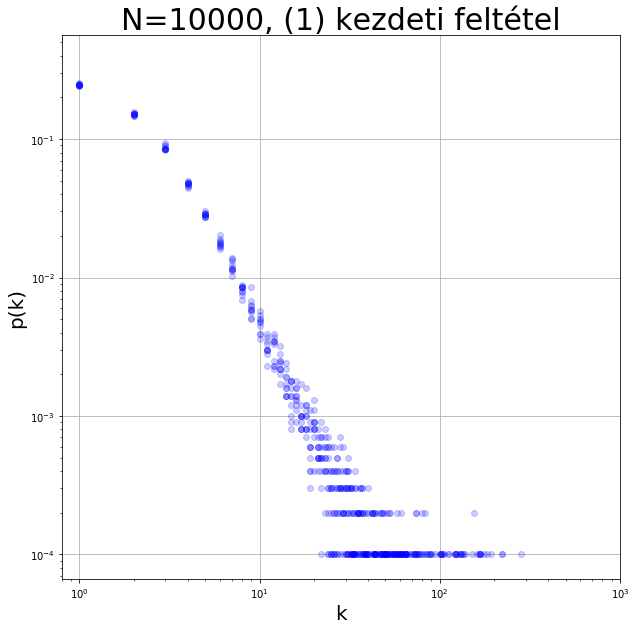

In [125]:
plt.figure(figsize=(10,10))
plt.title("N=10000, (1) kezdeti feltétel", fontsize=30)
for i in range(0,10):
    plt.plot(K1[i][:,0], K1[i][:,1]/np.sum(K1[i][:,1])," bo", alpha=0.2)
    #plt.plot(K2[i][:,0], K2[i][:,1],"-ro", alpha=0.2)
    #plt.plot(K3[i][:,0], K3[i][:,1],"-yo", alpha=0.2)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlim(8*10**-1,10**3)
plt.grid()
plt.savefig("pics\\_10k-1.pdf", format="pdf", bbox_inches="tight")
plt.show()

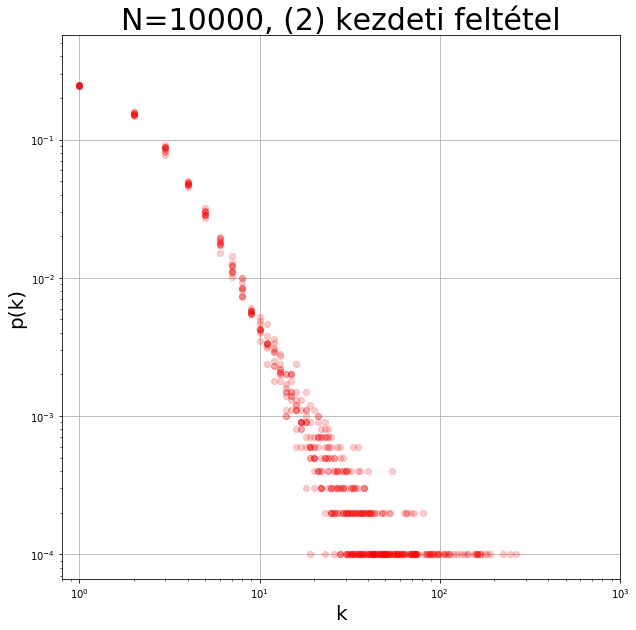

In [120]:
plt.figure(figsize=(10,10))
plt.title("N=10000, (2) kezdeti feltétel", fontsize=30)
for i in range(0,10):
    #plt.plot(K1[i][:,0], K1[i][:,1],"-bo", alpha=0.2)
    plt.plot(K2[i][:,0], K2[i][:,1]/np.sum(K2[i][:,1])," ro", alpha=0.2)
    #plt.plot(K3[i][:,0], K3[i][:,1],"-yo", alpha=0.2)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlim(8*10**-1,10**3)
plt.grid()
plt.savefig("pics\\_10k-2.pdf", format="pdf", bbox_inches="tight")
plt.show()

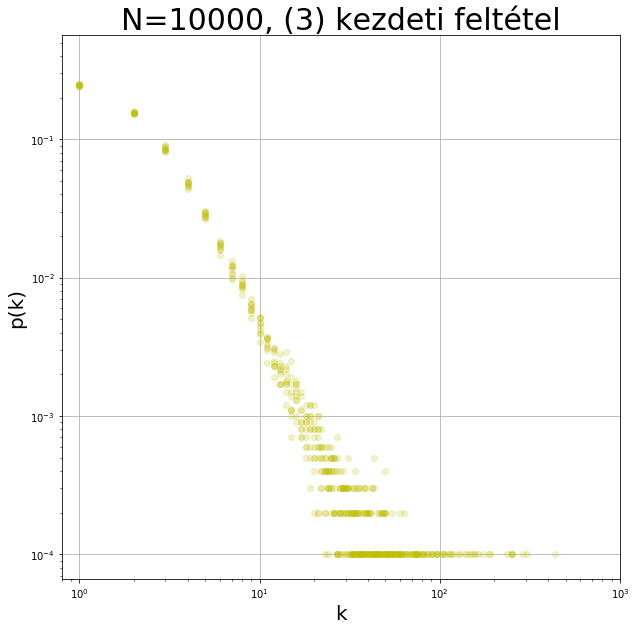

In [121]:
plt.figure(figsize=(10,10))
plt.title("N=10000, (3) kezdeti feltétel", fontsize=30)
for i in range(0,10):
    #plt.plot(K1[i][:,0], K1[i][:,1],"-bo", alpha=0.2)
    #plt.plot(K2[i][:,0], K2[i][:,1],"-ro", alpha=0.2)
    plt.plot(K3[i][:,0], K3[i][:,1]/np.sum(K3[i][:,1])," yo", alpha=0.2)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlim(8*10**-1,10**3)
plt.grid()
plt.savefig("pics\\_10k-3.pdf", format="pdf", bbox_inches="tight")
plt.show()

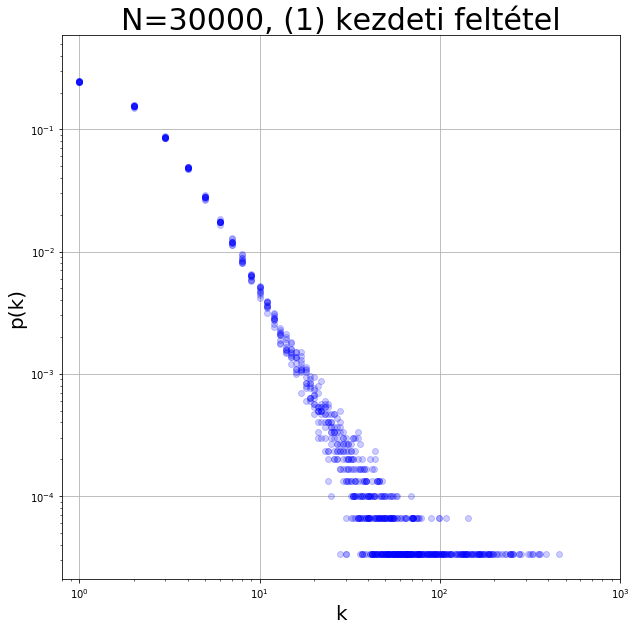

In [122]:
plt.figure(figsize=(10,10))
plt.title("N=30000, (1) kezdeti feltétel", fontsize=30)
for i in range(10,20):
    plt.plot(K1[i][:,0], K1[i][:,1]/np.sum(K1[i][:,1])," bo", alpha=0.2)
    #plt.plot(K2[i][:,0], K2[i][:,1],"-ro", alpha=0.2)
    #plt.plot(K3[i][:,0], K3[i][:,1],"-yo", alpha=0.2)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlim(8*10**-1,10**3)
plt.grid()
plt.savefig("pics\\_30k-1.pdf", format="pdf", bbox_inches="tight")
plt.show()

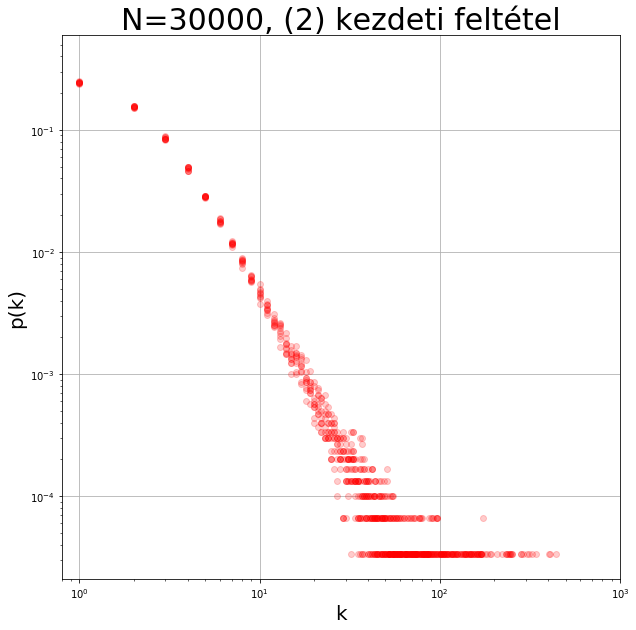

In [123]:
plt.figure(figsize=(10,10))
plt.title("N=30000, (2) kezdeti feltétel", fontsize=30)
for i in range(10,20):
    #plt.plot(K1[i][:,0], K1[i][:,1]," bo", alpha=0.2)
    plt.plot(K2[i][:,0], K2[i][:,1]/np.sum(K2[i][:,1])," ro", alpha=0.2)
    #plt.plot(K3[i][:,0], K3[i][:,1],"-yo", alpha=0.2)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlim(8*10**-1,10**3)
plt.grid()
plt.savefig("pics\\_30k-2.pdf", format="pdf", bbox_inches="tight")

plt.show()

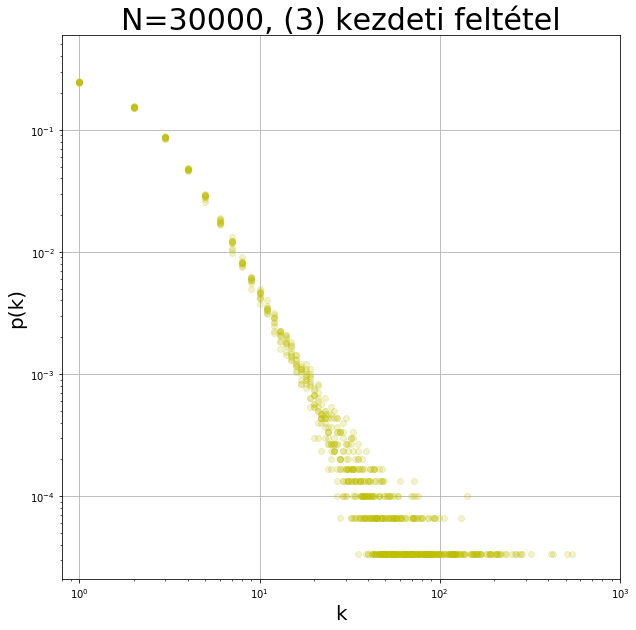

In [124]:
plt.figure(figsize=(10,10))
plt.title("N=30000, (3) kezdeti feltétel", fontsize=30)
for i in range(10,20):
    #plt.plot(K1[i][:,0], K1[i][:,1]," bo", alpha=0.2)
    #plt.plot(K2[i][:,0], K2[i][:,1]," ro", alpha=0.2)
    plt.plot(K3[i][:,0], K3[i][:,1]/np.sum(K3[i][:,1])," yo", alpha=0.2)
plt.xlabel("k", fontsize=20)
plt.ylabel("p(k)", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlim(8*10**-1,10**3)
plt.grid()
plt.savefig("pics\\_30k-3.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [101]:
#mivel ezeken kb semmi sem látszik, vegyük akkor a max_k elsozlást
av1_10k = np.average(MAX1[0:10]); sig1_10k = np.var(MAX1[0:10])**(1/2)
av2_10k = np.average(MAX2[0:10]); sig2_10k = np.var(MAX2[0:10])**(1/2)
av3_10k = np.average(MAX3[0:10]); sig3_10k = np.var(MAX3[0:10])**(1/2)

av1_30k = np.average(MAX1[10:20]); sig1_30k = np.var(MAX1[10:20])**(1/2)
av2_30k = np.average(MAX2[10:20]); sig2_30k = np.var(MAX2[10:20])**(1/2)
av3_30k = np.average(MAX3[10:20]); sig3_30k = np.var(MAX3[10:20])**(1/2)

print("10 ezer esetén:")
print("Mode1:\t k= ",av1_10k,"$\pm$ ",sig1_10k)
print("Mode2:\t k= ",av2_10k,"$\pm$ ",sig2_10k)
print("Mode3:\t k= ",av3_10k,"$\pm$ ",sig3_10k)

print("\n30 ezer esetén:")
print("Mode1:\t k= ",av1_30k,"$\pm$ ",sig1_30k)
print("Mode2:\t k= ",av2_30k,"$\pm$ ",sig2_30k)
print("Mode3:\t k= ",av3_30k,"$\pm$ ",sig3_30k)

10 ezer esetén:
Mode1:	 k=  191.4 $\pm$  39.63886981234455
Mode2:	 k=  191.1 $\pm$  36.995810573631175
Mode3:	 k=  264.6 $\pm$  66.28906395477311

30 ezer esetén:
Mode1:	 k=  322.6 $\pm$  59.0122021280345
Mode2:	 k=  332.8 $\pm$  63.27527163118306
Mode3:	 k=  347.8 $\pm$  109.70487682869891


In [83]:
MAX1[0:10].shape

(10,)